# Assignment # 4 : Hypothesis Testing.
## Data Science 350
In this assignment I am testing hypotheses to see the effect of various automobile features on the final price of the automobile.
* I am loading a cleansed automobile price data file provided in the assignment.
* As part of assignment exercise, I am calcualting the logarithm of price data.
* I am then normalizing the price and log(price) data using z-score algorithm.
* QQ test is being used to test the normality of price data.
* KS test is being used to compare and test the normality of price data.
* While stratifying the data, I am not using the sample function as the dataset is too small and taking a sample is leading to inconsistent results on multiple runs.
* Welch t-test is being used to gauge the effect of fuel type, drive wheel and aspiration on the price of automobile. 
  - One can clearly infer(Looking at means) that Diesel automobiles are costlier than Gas automobiles.
  - RWD cars are the most expensive cars and FWD are the most affordable cars.
  - Turbo cars are far more expensive than standard cars.
* KS-test is being used to gauge the effect of fuel type, drive wheel and aspiration on the price of automobile. In this test I can only check if the distributions are same, i however cannot however make any numerical predictions as this test is not calculating any key metric (For Ex: mean, median, sd etc).
  - One can clearly infer that Diesel automobiles are priced way differently than Gas automobiles.
  - RWD cars are the most expensive cars and FWD are the most affordable cars.
  - Turbo cars are priced way differently than standard cars.
* Visually comparing P-Value with KS - Statistics to confirm a drooping line as p-value approaches a maximum value of 1.
* Anova Analysis of price based on "Number of Doors" and "Body Style"
    - Analysis of "Number of Doors" accepts the null hypothesis and "Body Style" rejects the hypothesis.

## Function Description
In this function I am loading and cleansing "Automobile price data _Raw_.csv" provided to us as part of this assignment. Herein I am coercing some character columns to numeric so they can computed with ease using R functions. I then use the "complete.cases" function to remove any non numeric data. 

In [131]:
rm(list=ls())
# Clear Console:
cat("\014")
read.auto = function(file = 'Automobile price data _Raw_.csv'){
  ## Read the csv file
  auto.price <- read.csv(file, header = TRUE, 
                         stringsAsFactors = FALSE)
  
  ## Coerce some character columns to numeric
  numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
  auto.price[, numcols] <- lapply(auto.price[, numcols], as.numeric)
  
  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  auto.price[complete.cases(auto.price), ]
}

## Call the function and normalize the price data.
Here i am calling the function **read.auto()** to load the cleansed data.
In this process I have removed 10 records from this file. I now have a total of 195 observations in auto.price dataframe. 
- Retrieve price data and calculate it logarithm.
- Normalize the price and log(price) data using z-score algorithm.

In [132]:
# Load and cleanse the csv file.
auto.price = read.auto()
# Get price data in a vector
price <- auto.price$price
#Log of price data
logprice <- log(price)

#z-Score Normalization of price data
mean_price <- mean(price)
sd_price <- sd(price)
normalized_price <- (price - mean_price) / sd_price

#z-Score Normalization of log price data
mean_logprice <- mean(logprice)
sd_logprice <- sd(logprice)
normalized_logprice <- (logprice - mean_logprice) / sd_logprice


Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"

## Add log price and normalized log price to the data frame.
I am now using dplyr package to add two new columns in the loaded data frame (auto.price) so I can use this data for sampling.

In [133]:
#Add log price and normalized log price to the data frame.
require(dplyr)
auto.price = mutate(auto.price, logprice = logprice, normalized_price = normalized_price, normalized_logprice = normalized_logprice)

## Visually test normality
I am now going to use QQ plot to demonstrate the normality of normalised price and normalized log price data.
- You can see a factual straight line being formed in both the plots with normalized log price forming a visibly straighter line compared normalized price.

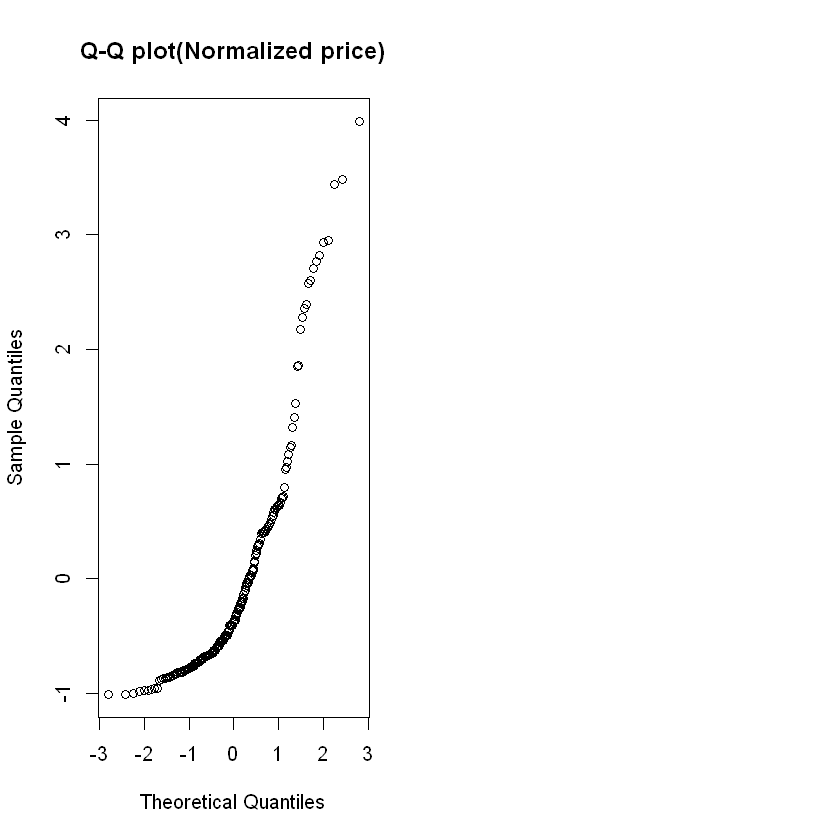

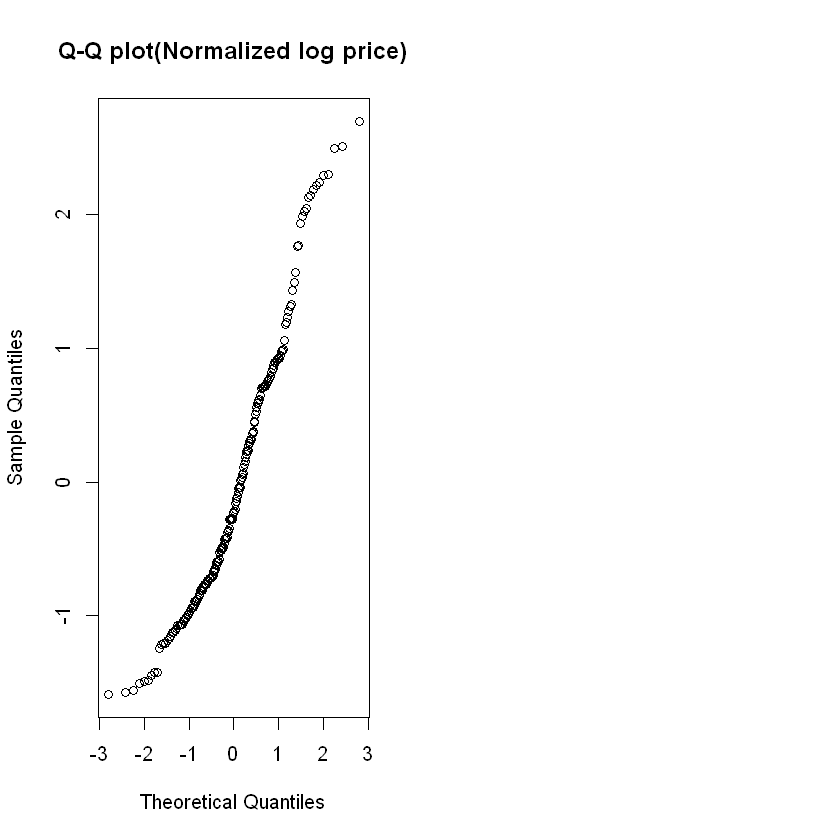

In [134]:
# QQ plot for price to visually check normality
par(mfrow = c(1, 2))
qqnorm(normalized_price, main = 'Q-Q plot(Normalized price)')
# QQ plot for logprice to visually check normality
par(mfrow = c(1, 2))
qqnorm(normalized_logprice, main = 'Q-Q plot(Normalized log price)')

## Visually Compare the standard price with standard log price
- I am using cummulative distribution function on price and log(price) data. One can see that there is no overlap between the two distribution.

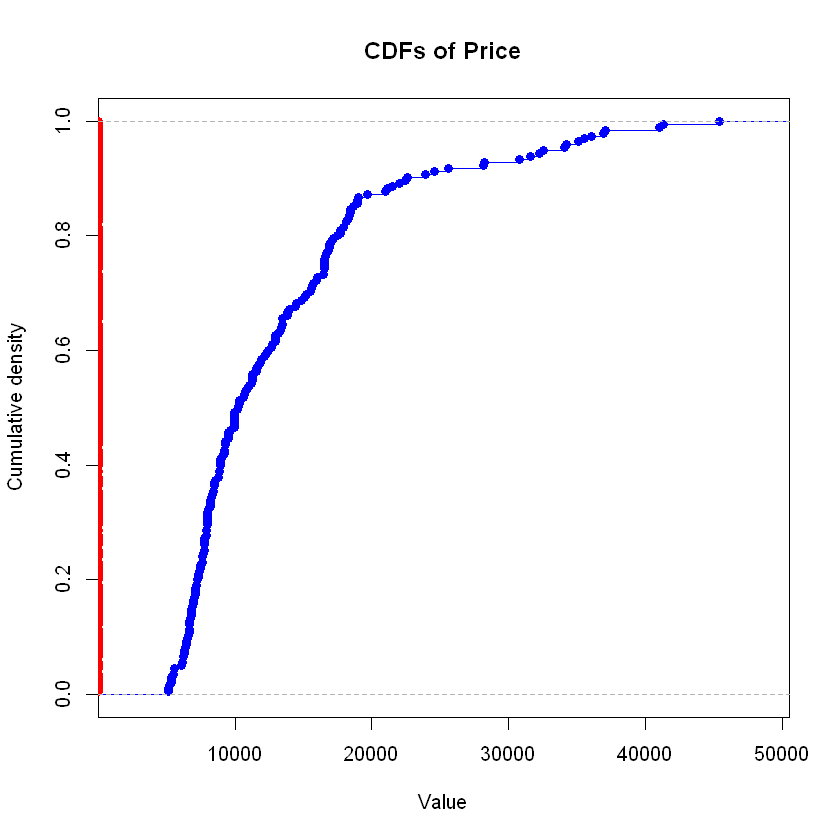

In [135]:
## Plot the cdfs of standard data.
plot(ecdf(price), col='blue', main ='CDFs of Price', 
     xlab = 'Value', ylab = 'Cumulative density')
lines(ecdf(logprice), col='red')

## Visually Compare the normalized price with normalized log price
- I am using cummulative distribution function on normalized price and normalized log(price) data. One can now see the overlap between the two normalized distributions.

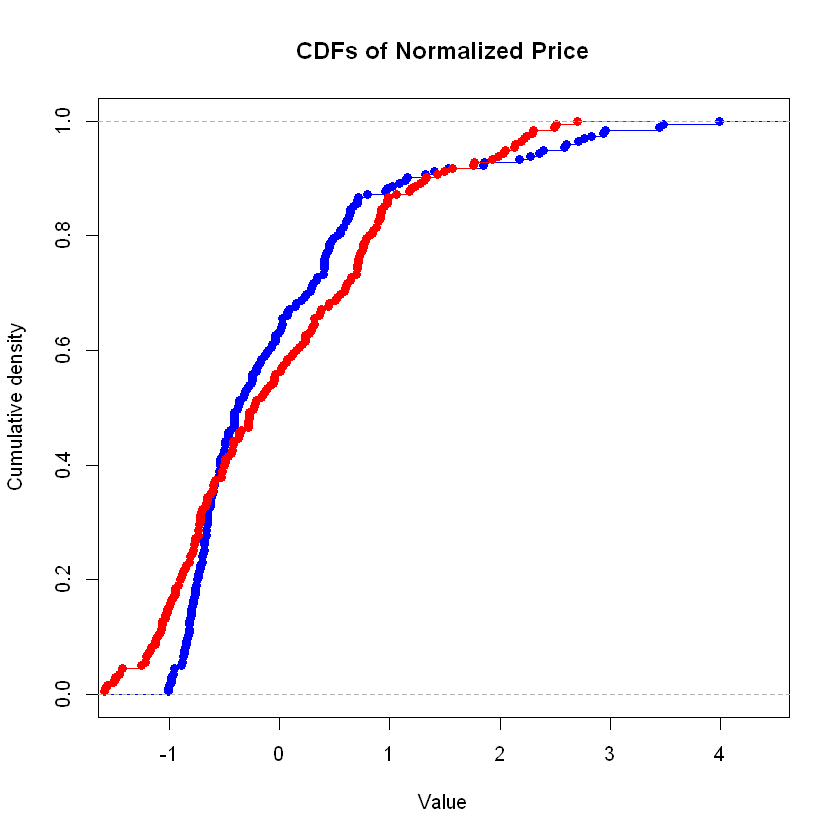

In [136]:
## Plot the cdfs on normalized data
plot(ecdf(normalized_price), col='blue', main ='CDFs of Normalized Price', 
     xlab = 'Value', ylab = 'Cumulative density')
lines(ecdf(normalized_logprice), col='red')

## Run KS test (One Sample) to gauge the normality.
- One can validate that K-S Statistic of normalized data (D = 0.42242) is way less than standard data(D = 1).

In [137]:
#K-S Test
ks.test(normalized_price, "pnorm", 1, 2)
ks.test(price, "pnorm", 1, 2)

Warning message in ks.test(normalized_price, "pnorm", 1, 2):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  normalized_price
D = 0.42242, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test(price, "pnorm", 1, 2):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  price
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


## Group automobile price data as per fuel type, drive wheel and aspiration.
- I am now using the stratifying technique to group the data as per fuel type, drive wheel and aspiration.

In [138]:
#Stratifying the data.
n = 5
#Group By Fuel Type
#stratified_pricefuel = auto.price %>% group_by(fuel.type) %>% sample_n(n, replace = FALSE)
stratified_pricefuel = auto.price %>% group_by(fuel.type)
logpricegroupedbyfueltypegas = stratified_pricefuel %>% filter(fuel.type == 'gas')
logpricegroupedbyfueltypediesel = stratified_pricefuel %>% filter(fuel.type == 'diesel')
#Group by Aspiration
#stratified_priceasp = auto.price %>% group_by(aspiration) %>% sample_n(n, replace = FALSE)
stratified_priceasp = auto.price %>% group_by(aspiration)
logpricegroupedbyaspirationstd = stratified_priceasp %>% filter(aspiration == 'std')
logpricegroupedbyaspirationsturbo = stratified_priceasp %>% filter(aspiration == 'turbo')
#Group by drive wheel
#stratified_pricedrive = auto.price %>% group_by(drive.wheels) %>% sample_n(n, replace = FALSE)
stratified_pricedrive = auto.price %>% group_by(drive.wheels)
logpricegroupedbydrivewheelfwd = stratified_pricedrive %>% filter(drive.wheels == 'fwd')
logpricegroupedbydrivewheelrwd = stratified_pricedrive %>% filter(drive.wheels == 'rwd')
logpricegroupedbydrivewheel4wd = stratified_pricedrive %>% filter(drive.wheels == '4wd')

## Welch T-Test : Test the impact of fuel type, drive wheel and aspiration on price data.
- I am now using Welch t-test to gauge the impact on price data wherein a confidence interval of 95% is being deduced i.e **we don't want an Type 1 error of greater than 5%.**
- Gas vehicles have P-value of 0.6538, this very high P value would force us to **<span style="color:red" >accept the null hypothesis</span>** and infer that there is a 65% likelihood of a Type 1 error if we reject the hypothesis. In other words atleast 65% of gas automobiles match the average price of an automobile from the dataframe.
- Diesel vehicles have P-value of 0.08375, this P value would force us to **<span style="color:red" >accept the null hypothesis</span>** and infer that there is a 8% likelihood of a Type 1 error if we reject the hypothesis. In other words atleast 8% of diesel automobiles match the average price of an automobile from the dataframe.
       ** One can clearly infer(Looking at means) that Diesel automobiles are costlier than Gas automobiles.
- 4WD vehicles have P-value of 0.1813, this P value would force us to **<span style="color:red" >accept the null hypothesis</span>** and infer that there is a 18% likelihood of a Type 1 error if we reject the hypothesis. In other words atleast 18 % of 4WD automobiles match the average price of an automobile from the dataframe.
- FWD vehicles have P-value of 0.00000001593, this extremely low P value would force us to **<span style="color:red" >reject the null hypothesis</span>** and infer that there is a 0.000001593% likelihood of a Type 1 error if we reject the hypothesis. In other words average price of FWD does not match the average price of the car from the data frame.
- RWD vehicles have P-value of 0.00000000002175, this extremely low P value would force us to **<span style="color:red" >reject the null hypothesis</span>** and infer that there is a 0.000000002175% likelihood of a Type 1 error if we reject the hypothesis. In other words average price of RWD does not match the average price of the car from the data frame.
       **RWD cars are the most expensive cars and FWD are the most affordable cars
- Standard vehicles have P-value of 0.2534, this P value would force us to **<span style="color:red" >accept the null hypothesis</span>** and infer that there is a 25% likelihood of a Type 1 error if we reject the hypothesis. In other words atleast 25 % of standard automobiles match the average price of an automobile from the dataframe.
- Turbo vehicles have P-value of 0.0003893, this extremely low P value would force us to **<span style="color:red" >reject the null hypothesis</span>** and infer that there is a 0.03893% likelihood of a Type 1 error if we reject the hypothesis. In other words average price of Turbo does not match the average price of the car from the data frame.
       **Turbo cars are far more expensive than standard cars.

In [139]:
## Student T-Test to gauge the impact on the fuel price.
#Gauge impact of fuel type on price
t.test(logpricegroupedbyfueltypegas$normalized_logprice, auto.price$normalized_logprice, alternative = "two.sided")
t.test(logpricegroupedbyfueltypediesel$normalized_logprice, auto.price$normalized_logprice, alternative = "two.sided")
#Gauge impact of drive wheel on price
t.test(logpricegroupedbydrivewheel4wd$normalized_logprice, auto.price$normalized_logprice, alternative = "two.sided")
t.test(logpricegroupedbydrivewheelfwd$normalized_logprice, auto.price$normalized_logprice, alternative = "two.sided")
t.test(logpricegroupedbydrivewheelrwd$normalized_logprice, auto.price$normalized_logprice, alternative = "two.sided")
#Gauge impact of aspiration on price
t.test(logpricegroupedbyaspirationstd$normalized_logprice, auto.price$normalized_logprice, alternative = "two.sided")
t.test(logpricegroupedbyaspirationsturbo$normalized_logprice, auto.price$normalized_logprice, alternative = "two.sided")


	Welch Two Sample t-test

data:  logpricegroupedbyfueltypegas$normalized_logprice and auto.price$normalized_logprice
t = -0.4489, df = 363.98, p-value = 0.6538
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2510588  0.1577406
sample estimates:
    mean of x     mean of y 
-4.665909e-02  8.989748e-16 



	Welch Two Sample t-test

data:  logpricegroupedbyfueltypediesel$normalized_logprice and auto.price$normalized_logprice
t = 1.8062, df = 23.447, p-value = 0.08375
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.05884393  0.87537791
sample estimates:
   mean of x    mean of y 
4.082670e-01 8.989748e-16 



	Welch Two Sample t-test

data:  logpricegroupedbydrivewheel4wd$normalized_logprice and auto.price$normalized_logprice
t = -1.4488, df = 9.0149, p-value = 0.1813
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7699184  0.1686483
sample estimates:
    mean of x     mean of y 
-3.006350e-01  8.989748e-16 



	Welch Two Sample t-test

data:  logpricegroupedbydrivewheelfwd$normalized_logprice and auto.price$normalized_logprice
t = -5.8059, df = 307.86, p-value = 1.593e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7196314 -0.3553186
sample estimates:
    mean of x     mean of y 
-5.374750e-01  8.989748e-16 



	Welch Two Sample t-test

data:  logpricegroupedbydrivewheelrwd$normalized_logprice and auto.price$normalized_logprice
t = 7.2722, df = 142.12, p-value = 2.175e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.6640949 1.1599101
sample estimates:
   mean of x    mean of y 
9.120025e-01 8.989748e-16 



	Welch Two Sample t-test

data:  logpricegroupedbyaspirationstd$normalized_logprice and auto.price$normalized_logprice
t = -1.1441, df = 336.47, p-value = 0.2534
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.33424825  0.08841795
sample estimates:
    mean of x     mean of y 
-1.229152e-01  8.989748e-16 



	Welch Two Sample t-test

data:  logpricegroupedbyaspirationsturbo$normalized_logprice and auto.price$normalized_logprice
t = 3.7573, df = 60.352, p-value = 0.0003893
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.2538966 0.8318539
sample estimates:
   mean of x    mean of y 
5.428753e-01 8.989748e-16 


## KS-Test : Test the impact of fuel type, drive wheel and aspiration on price data.
- I am now using KS Test to gauge the impact on price data.
- Gas vehicles have P-value of 1 and D of 0.025788, this very high P value and low D value would force us to **<span style="color:red" >accept the null hypothesis</span>**. In other words a great majority of gas automobiles match the average price of an automobile from the dataframe.
- Diesel vehicles have P-value of 0.3142 and D of 0.22654, this combination of P and D value would still compel us to **<span style="color:red" >accept the null hypothesis</span>** and infer that a small number of diesel automobiles match the average price of an automobile from the dataframe.
       ** One can clearly infer that Diesel automobiles are priced way differently than Gas automobiles.
- 4WD vehicles have P-value of 0.4908 and D of 0.30064, this combination of P and D value would compel us to **<span style="color:red" >accept the null hypothesis</span>** and infer that a fair number of 4WD automobiles match the average price of an automobile from the dataframe.
- FWD vehicles have a P-value of  0.0001639 and D of 0.25433, this extremely low P value would force us to **<span style="color:red" >reject the null hypothesis</span>** and infer that average price of FWD does not match the average price of the car from the data frame.
- RWD vehicles have P-value of 5.597e-09 and D of 0.43496, this extremely low P value would force us to **<span style="color:red" >reject the null hypothesis</span>** and infer that average price of RWD does not match the average price of the car from the data frame.
       **RWD cars are priced way differently when compared to 4WD and FWD cars.
- Standard vehicles have P-value of 0.7067 and D of 0.075085, this extremely value of D value would force us to **<span style="color:red" >accept the null hypothesis</span>** and infer that standard automobiles match the average price of an automobile from the dataframe.
- Turbo vehicles have P-value of 0.002501 and D of 0.33162, this extremely low P value would force us to **<span style="color:red" >reject the null hypothesis</span>** and infer that there is average price of Turbo does not match the average price of the car from the data frame.
       **Turbo cars are priced way differently than standard cars.

In [140]:
#K-S Test
#Gauge impact of fuel type on price
ks_df <- data.frame()
ks_logpricegroupedbyfueltypegas <- ks.test(logpricegroupedbyfueltypegas$normalized_logprice, auto.price$normalized_logprice)
ks_logpricegroupedbyfueltypegas
ks_df[1,1] <- ks_logpricegroupedbyfueltypegas$p.value
ks_df[1,2] <- ks_logpricegroupedbyfueltypegas$statistic
ks_logpricegroupedbyfueltypediesel <- ks.test(logpricegroupedbyfueltypediesel$normalized_logprice, auto.price$normalized_logprice)
ks_logpricegroupedbyfueltypediesel
ks_df[2,1] <- ks_logpricegroupedbyfueltypediesel$p.value
ks_df[2,2] <- ks_logpricegroupedbyfueltypediesel$statistic
#Gauge impact of drive wheel on price
ks_logpricegroupedbydrivewheel4wd <- ks.test(logpricegroupedbydrivewheel4wd$normalized_logprice, auto.price$normalized_logprice)
ks_logpricegroupedbydrivewheel4wd
ks_df[3,1] <- ks_logpricegroupedbydrivewheel4wd$p.value
ks_df[3,2] <- ks_logpricegroupedbydrivewheel4wd$statistic
ks_logpricegroupedbydrivewheelfwd <- ks.test(logpricegroupedbydrivewheelfwd$normalized_logprice, auto.price$normalized_logprice)
ks_logpricegroupedbydrivewheelfwd
ks_df[4,1] <- ks_logpricegroupedbydrivewheelfwd$p.value
ks_df[4,2] <- ks_logpricegroupedbydrivewheelfwd$statistic
ks_logpricegroupedbydrivewheelrwd <- ks.test(logpricegroupedbydrivewheelrwd$normalized_logprice, auto.price$normalized_logprice)
ks_logpricegroupedbydrivewheelrwd
ks_df[5,1] <- ks_logpricegroupedbydrivewheelrwd$p.value
ks_df[5,2] <- ks_logpricegroupedbydrivewheelrwd$statistic
#Gauge impact of aspiration on price
ks_logpricegroupedbyaspirationstd <- ks.test(logpricegroupedbyaspirationstd$normalized_logprice, auto.price$normalized_logprice)
ks_logpricegroupedbyaspirationstd
ks_df[6,1] <- ks_logpricegroupedbyaspirationstd$p.value
ks_df[6,2] <- ks_logpricegroupedbyaspirationstd$statistic
ks_logpricegroupedbyaspirationsturbo <- ks.test(logpricegroupedbyaspirationsturbo$normalized_logprice, auto.price$normalized_logprice)
ks_logpricegroupedbyaspirationsturbo
ks_df[7,1] <- ks_logpricegroupedbyaspirationsturbo$p.value
ks_df[7,2] <- ks_logpricegroupedbyaspirationsturbo$statistic
headers <-c("pvalue","statistic")
names(ks_df) <- headers

Warning message in ks.test(logpricegroupedbyfueltypegas$normalized_logprice, auto.price$normalized_logprice):
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  logpricegroupedbyfueltypegas$normalized_logprice and auto.price$normalized_logprice
D = 0.025788, p-value = 1
alternative hypothesis: two-sided


Warning message in ks.test(logpricegroupedbyfueltypediesel$normalized_logprice, :
"cannot compute exact p-value with ties"


	Two-sample Kolmogorov-Smirnov test

data:  logpricegroupedbyfueltypediesel$normalized_logprice and auto.price$normalized_logprice
D = 0.22564, p-value = 0.3142
alternative hypothesis: two-sided


Warning message in ks.test(logpricegroupedbydrivewheel4wd$normalized_logprice, auto.price$normalized_logprice):
"cannot compute exact p-value with ties"


	Two-sample Kolmogorov-Smirnov test

data:  logpricegroupedbydrivewheel4wd$normalized_logprice and auto.price$normalized_logprice
D = 0.30064, p-value = 0.4908
alternative hypothesis: two-sided


Warning message in ks.test(logpricegroupedbydrivewheelfwd$normalized_logprice, auto.price$normalized_logprice):
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  logpricegroupedbydrivewheelfwd$normalized_logprice and auto.price$normalized_logprice
D = 0.25433, p-value = 0.0001639
alternative hypothesis: two-sided


Warning message in ks.test(logpricegroupedbydrivewheelrwd$normalized_logprice, auto.price$normalized_logprice):
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  logpricegroupedbydrivewheelrwd$normalized_logprice and auto.price$normalized_logprice
D = 0.43496, p-value = 5.597e-09
alternative hypothesis: two-sided


Warning message in ks.test(logpricegroupedbyaspirationstd$normalized_logprice, auto.price$normalized_logprice):
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  logpricegroupedbyaspirationstd$normalized_logprice and auto.price$normalized_logprice
D = 0.075085, p-value = 0.7067
alternative hypothesis: two-sided


Warning message in ks.test(logpricegroupedbyaspirationsturbo$normalized_logprice, :
"cannot compute exact p-value with ties"


	Two-sample Kolmogorov-Smirnov test

data:  logpricegroupedbyaspirationsturbo$normalized_logprice and auto.price$normalized_logprice
D = 0.33162, p-value = 0.002501
alternative hypothesis: two-sided


## Visualize the relationshipt between P-Value & KS Statistics
- A higher P-value with a decreasing KS Statistics (D) clearly rejects the null hypothesis.

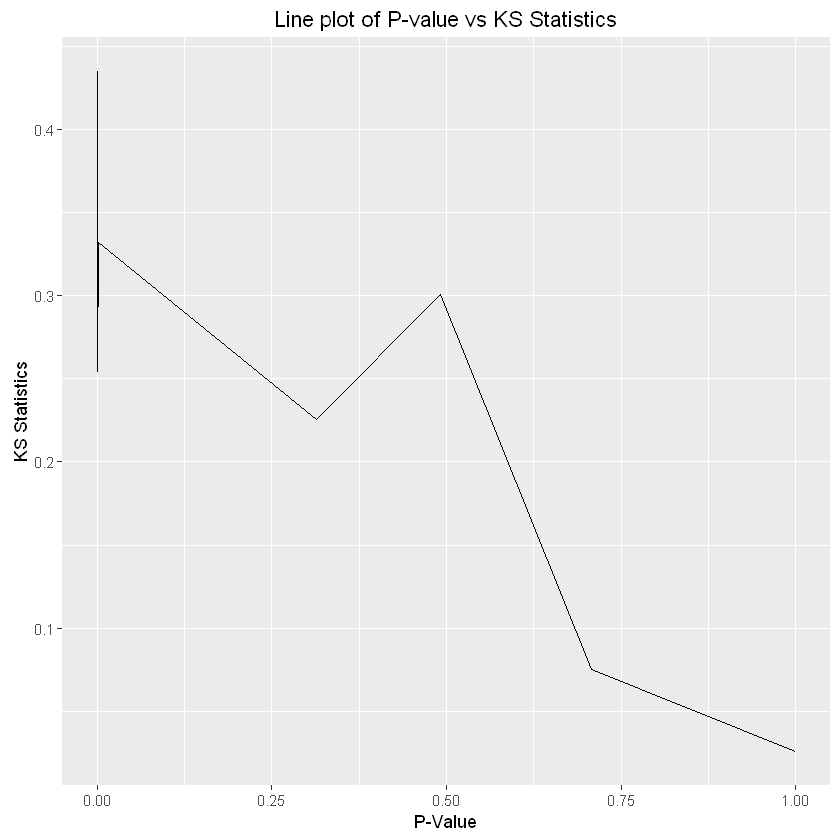

In [141]:
ggplot(ks_df, aes(ks_df$pvalue, ks_df$statistic)) + geom_line() + ggtitle('Line plot of P-value vs KS Statistics') +
xlab('P-Value') + ylab('KS Statistics')

## Stratify Data For ANOVA
- Stratifying data as per number of doors and body style.

In [142]:
#Group By number of doors
stratified_pricedoors = auto.price %>% group_by(num.of.doors) %>% filter(num.of.doors != '?')
#Group by body style
stratified_pricebody = auto.price %>% group_by(body.style) %>% sample_n(n, replace = FALSE)

## Visually show the relationship of price based on number of doors to the average price and body style to the average price.

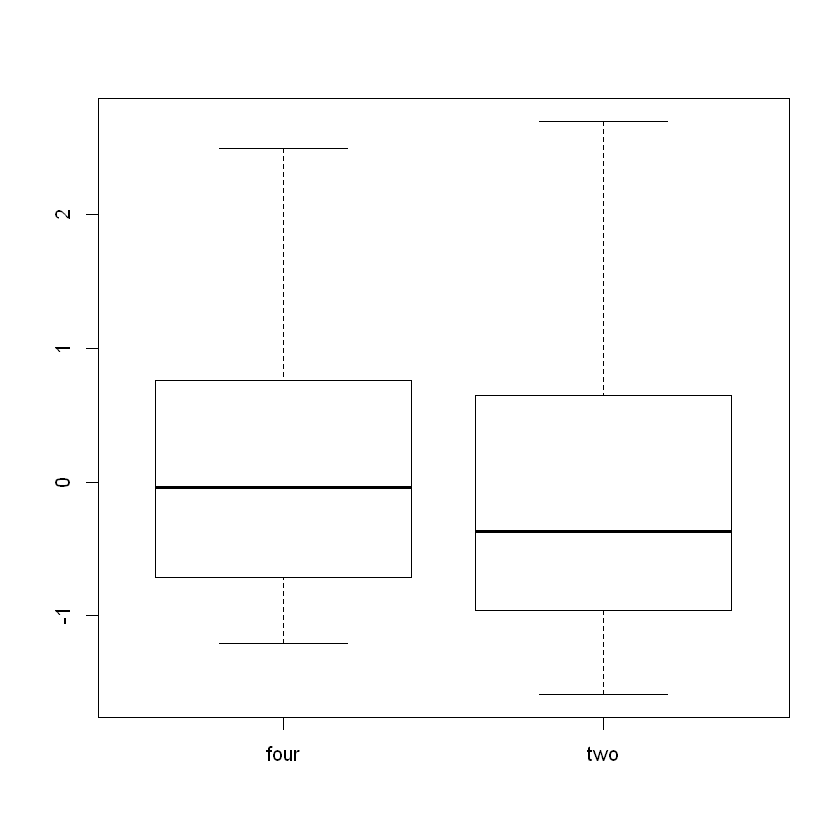

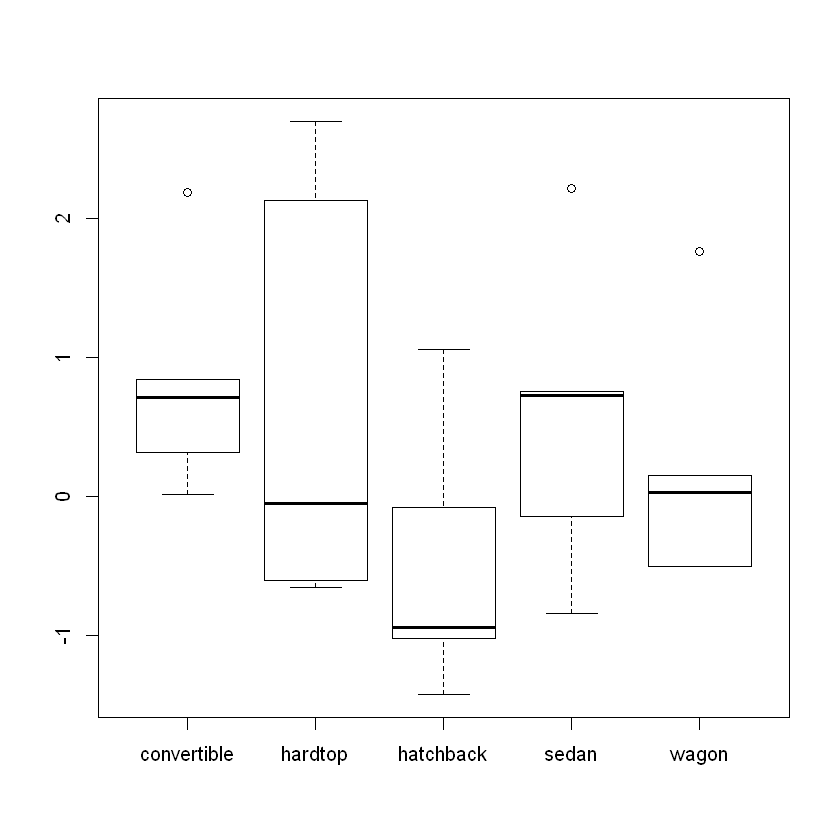

In [143]:
#Boxplot number of doors
stratified_pricedoors$num.of.doors = factor(stratified_pricedoors$num.of.doors) # Make sure your groups are a factor
boxplot(stratified_pricedoors$normalized_logprice ~ stratified_pricedoors$num.of.doors)
#Boxplot body style
stratified_pricebody$body.style = factor(stratified_pricebody$body.style) # Make sure your groups are a factor (for further analysis below)
boxplot(stratified_pricebody$normalized_logprice ~ stratified_pricebody$body.style)

## Anova analysis based on number of doors & Body Style.
- In the door analysis we have two groups of two and four doors, you can see a low F value and P-value of 0.129. P-value is greater than 0.05 and this would lead us to **accept the null hypothesis**. Tukey HSD will provide a stronger (i.e. Honest) answer.
- In the body style analysis there are 5 groups and we can see a higher F value with a an extremely low P-value, this by itself is enough to **reject the hypothesis**. Tukey HSD will provide a stronger answer.
- Power of Anova analysis is felt while analysing body style as it has 5(more than 2) groups.

In [144]:
#Anova analysis for number of doors group
df_aov_door = aov(stratified_pricedoors$normalized_logprice ~ stratified_pricedoors$num.of.doors, data = stratified_pricedoors)
summary(df_aov_door)
#Anova analysis for body style group
df_aov_body = aov(stratified_pricebody$normalized_logprice ~ stratified_pricebody$body.style, data = stratified_pricebody)
summary(df_aov_body)

                                    Df Sum Sq Mean Sq F value Pr(>F)
stratified_pricedoors$num.of.doors   1   2.33   2.334   2.331  0.129
Residuals                          191 191.31   1.002               

                                Df Sum Sq Mean Sq F value Pr(>F)
stratified_pricebody$body.style  4  5.464   1.366   1.069  0.398
Residuals                       20 25.569   1.278               

## Tukey Analysis on number of doors & body style.
- In number of doors you can see 1 difference between 2 & 4 doors with a a low p-adj with a negative difference.
- In body style you see 10 differences between 5 groups and in this mix you can clearly see a low P-adj and significant difference in hatchback-convertible,hatchback-hardtop,sedan-hardtop & wagon-hardtop.
- One can also see so almost no difference in hardtop-convertible & wagon-sedan.

In [145]:
#Tukey Analysis for door
tukey_anova_door = TukeyHSD(df_aov_door)  # Tukey's Range test:
tukey_anova_door
#Tukey Analysis for body style
tukey_anova_body = TukeyHSD(df_aov_body)  # Tukey's Range test:
tukey_anova_body

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = stratified_pricedoors$normalized_logprice ~ stratified_pricedoors$num.of.doors, data = stratified_pricedoors)

$`stratified_pricedoors$num.of.doors`
               diff        lwr        upr    p adj
two-four -0.2228515 -0.5107836 0.06508059 0.128507


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = stratified_pricebody$normalized_logprice ~ stratified_pricebody$body.style, data = stratified_pricebody)

$`stratified_pricebody$body.style`
                            diff       lwr       upr     p adj
hardtop-convertible   -0.1109500 -2.250821 2.0289209 0.9998575
hatchback-convertible -1.2948831 -3.434754 0.8449877 0.3950779
sedan-convertible     -0.2714195 -2.411290 1.8684514 0.9952250
wagon-convertible     -0.6236817 -2.763553 1.5161892 0.9037441
hatchback-hardtop     -1.1839332 -3.323804 0.9559377 0.4816267
sedan-hardtop         -0.1604695 -2.300340 1.9794014 0.9993856
wagon-hardtop         -0.5127318 -2.652603 1.6271391 0.9501086
sedan-hatchback        1.0234637 -1.116407 3.1633345 0.6158101
wagon-hatchback        0.6712014 -1.468669 2.8110723 0.8784215
wagon-sedan           -0.3522623 -2.492133 1.7876086 0.9871607


## Plot Tukey Analysis to visually confirm the above analysis.

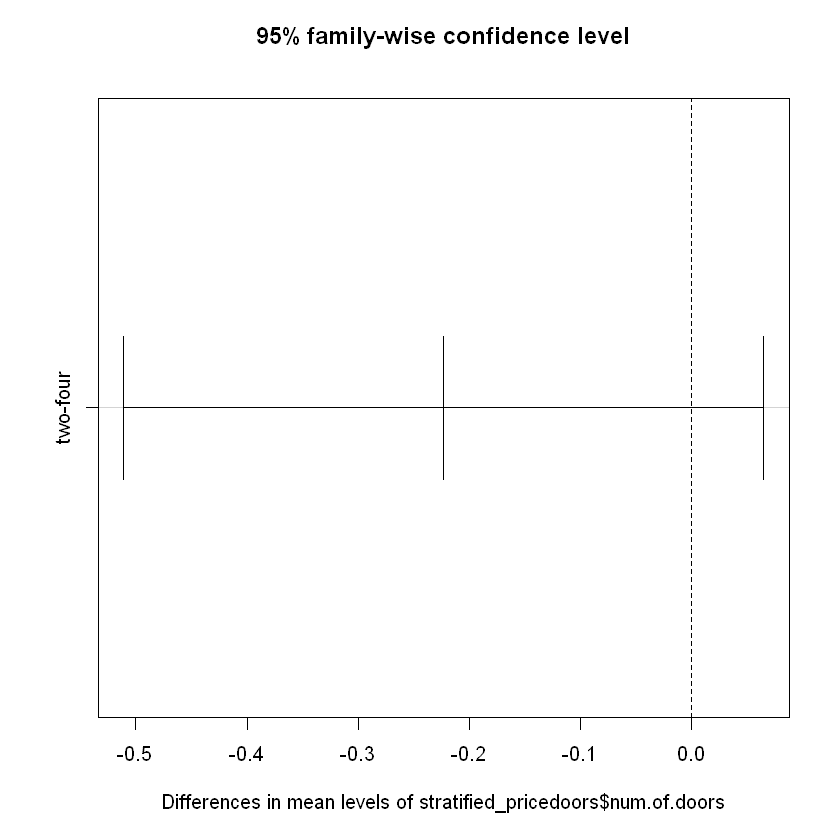

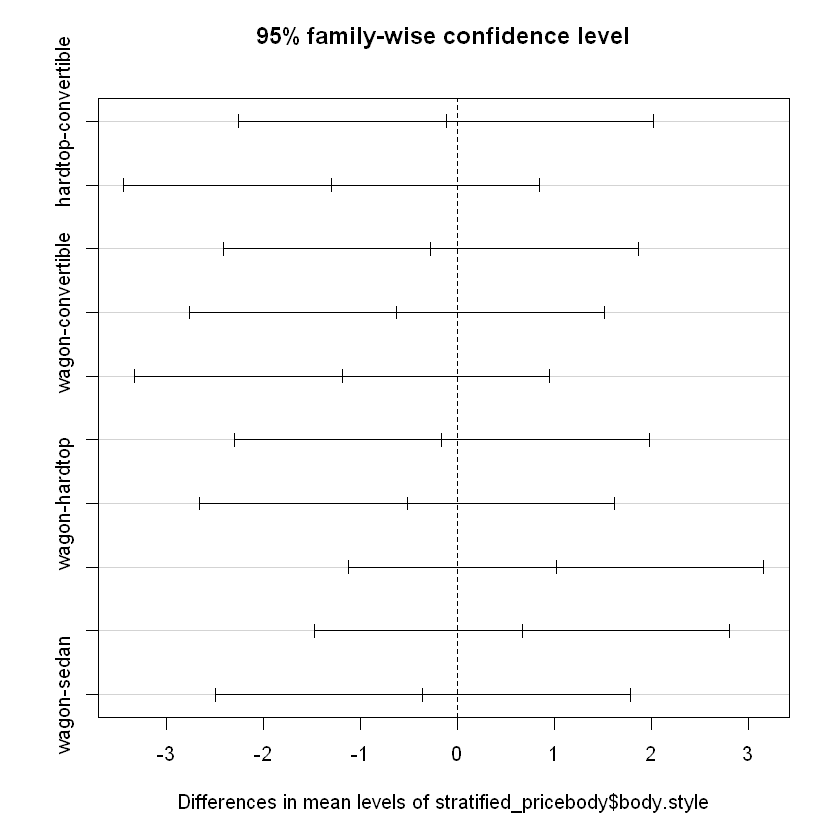

In [146]:
#Plot Tukey door
plot(tukey_anova_door)
#Plot Tukey Body Style
plot(tukey_anova_body)